# Lab 3- Training the Deep Neural Network in your head (aka Hand Scan)

## Introduction
Before High Energy Physicists used computers with automatic reconstruction to turn raw data into features, they relied on hand scans performed by people. In this lab we will setup a hand scan using the Liquid Argon TPC (LArTPC) data we looked at last time. The task will be to identify the type of particle. You will be the handscanner. The steps are as follows:

    * Data Engineering: Load data from various files
    * Training: Train the handscanner by presenting images of the data with the labels.
    * Validation: Ask the handscanner to classify some randomly selected images, and see how well they do.


## Data Engineering

Our data is stored in a bunch of files. You can see the files by listing the directory using the unix "ls" command. You can call shell commands, like "ls", from Jupyter:

In [1]:
!ls /data/LArIAT/h5_files/

antielectron_0-1462146945.h5   nuebar_NC_4-1469512487.h5
antielectron_0-1462204074.h5   nuebar_NC_4-1469512529.h5
antielectron_0-1462522993.h5   nuebar_NC_4-1469512634.h5
antielectron_1-1462146945.h5   nuebar_NC_4-1469512704.h5
antielectron_1-1462204074.h5   nuebar_NC_4-1469512742.h5
antielectron_1-1462522993.h5   nuebar_NC_4-1469512962.h5
antielectron_10-1462146945.h5  nuebar_NC_4-1469513002.h5
antielectron_10-1462204074.h5  nuebar_NC_4-1469513040.h5
antielectron_10-1462522993.h5  nuebar_NC_4-1469513081.h5
antielectron_11-1462146945.h5  nuebar_NC_4-1469513114.h5
antielectron_11-1462204074.h5  nuebar_NC_4-1469513150.h5
antielectron_11-1462522993.h5  nuebar_NC_4-1469513218.h5
antielectron_12-1462204074.h5  nuebar_NC_4-1469513267.h5
antielectron_12-1462522993.h5  nuebar_NC_4-1469513311.h5
antielectron_13-1462204074.h5  nuebar_NC_4-1469513349.h5
antielectron_13-1462522993.h5  nuebar_NC_4-1469513392.h5
antielectron_14-1462146945.h5  nuebar_NC_4-1469513434.h5
antielectron_14-1462204074.h5  

That's a lot of files. Lets count how many... in python. There are a variety of ways of getting back a directory listing in python. Here's one:

In [2]:
import glob
Files=glob.glob("/data/LArIAT/h5_files/*")
print "Number of Files:", len(Files)
print "First Filename:", Files[0]

Number of Files: 6745
First Filename: /data/LArIAT/h5_files/electron_9-1463722329.h5


Looking at the file names, you notice that they start with the type of particle. Each file contains a samples of "events". In each event, we simulated shooting a particle into the detector and stored the response. The name of the file specifies what type of particle was simulated in that file.

Let's try to figure out what types. We'll loop over the file names, strip out the first part of the file name, and store it in a dictionary:

In [3]:
import os

FileCount= {}  # Store the count here
FileLists= {}  # Organize the files by particle type here.

for aFile in Files:
    # Lets strip the path (everything before the "/"s) and get the filename:
    FileName=os.path.basename(aFile)
    
    # Now use everything before the first "_" as the particle name
    ParticleName=FileName.split('_')[0]

    if ParticleName in FileCount.keys():
        FileCount[ParticleName]+=1
        FileLists[ParticleName].append(aFile)
    else:
        FileCount[ParticleName]=1
        FileLists[ParticleName]= [aFile]


print "Number of types of particles:", len(FileCount.keys())
print "----------------------------------------------------------"
print "Number of files for each particle type:", FileCount
print "----------------------------------------------------------"
print "First file of each type:"
for aFile in FileLists:
    print aFile,":",FileLists[aFile][0]
print len(FileLists)

Number of types of particles: 16
----------------------------------------------------------
Number of files for each particle type: {'numu': 944, 'kaonPlus': 417, 'antielectron': 48, 'pion': 240, 'numubar': 747, 'nuebar': 631, 'photon': 185, 'antiproton': 360, 'proton': 268, 'electron': 339, 'muon': 277, 'pionPlus': 399, 'kaonMinus': 396, 'nue': 616, 'antimuon': 411, 'pionMinus': 467}
----------------------------------------------------------
First file of each type:
numu : /data/LArIAT/h5_files/numu_CC_7-1468443731.h5
kaonPlus : /data/LArIAT/h5_files/kaonPlus_11-1466643524.h5
antielectron : /data/LArIAT/h5_files/antielectron_17-1462522993.h5
pion : /data/LArIAT/h5_files/pion_0_19-1463161413.h5
numubar : /data/LArIAT/h5_files/numubar_CC_1-1469306203.h5
nuebar : /data/LArIAT/h5_files/nuebar_CC_3-1469468394.h5
photon : /data/LArIAT/h5_files/photon_12-1466805843.h5
antiproton : /data/LArIAT/h5_files/antiproton_7-1466998603.h5
proton : /data/LArIAT/h5_files/proton_8-1466779796.h5
electron 

We can count how many examples are in each file by open them up in h5py like we did in the last lab:

In [4]:
import h5py

f=h5py.File(FileLists["pionPlus"][0],"r")

# Read the First N_Events. Data is stored as float16, lets store it as float32 to avoid overflows later when we sum.
print "Shape of the data:", f["features"].shape
print "Number of events in file:", f["features"].shape[0]

f.close()

Shape of the data: (500, 2, 240, 4096)
Number of events in file: 500


### Exercise 3.1- Basic File Manipulation

Create two dictionaries. Store the total number of events of each particle type in one. Store the number events in each file in another. 

In [5]:
N_Events_perType = {}
N_Events_perFile = {}

### BEGIN SOLUTION

for aFile in FileLists:
    
    N_Events_perType[aFile] = 0;
    N_Events_perFile[aFile] = [];
    for length in range(0, len(FileLists[aFile])):
        
        myFile=h5py.File(FileLists[aFile][length],"r")
        Events = myFile["features"].shape[0];
        N_Events_perType[aFile] += Events;
        N_Events_perFile[aFile].append(Events);
        myFile.close();
    

### END SOLUTION

## Training

We will use matplotlib for most of our plotting. There are lots of tutorials and primers out there that you can find searching the web. A good tutorial can be found in the [Scipy Lectures](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html). Look through these on your own time, it is not necessary for doing these exercises.

The raw data from a LArTPC detector looks like an image. The LArIAT detector, which we have simulated, has 2 readout views. The following code gives you an example how to plot these images. 

Data shape: (500, 2, 240, 4096)


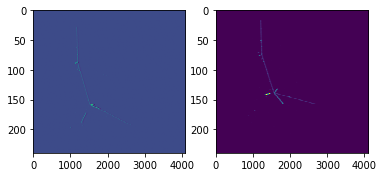

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Load the first pion file
f=h5py.File(FileLists["pionPlus"][0],"r")

# Get the images
images=f["features"]

print "Data shape:", images.shape

def PlotEvent(image):
    # Make two plots. Create a 1 by 2 grid the plots.
    ax1 = plt.subplot(1,2,1)
    ax2 = plt.subplot(1,2,2)

    # Plot the first view. Note: [EventNumber, View] = [0,0]
    ax1.imshow(np.array(image[0],dtype="float32"))

    # Plot the second view 
    ax2.imshow(np.array(image[1],dtype="float32"))

    # The data is 240 by 4096. Change the aspect ratio so the plot is not squished. 
    ax1.set_aspect(16)
    ax2.set_aspect(16)

# Plot the 5th Event
PlotEvent(images[200])
f.close()

### Exercise 3.2.1- Setup Training

Write a function that takes a file, and creates a grid of plots showing the first N events. Use this function to plot the first 9 events in the first file of each particle type in a 3 by 3 grid. You only need to show one view.

numu :


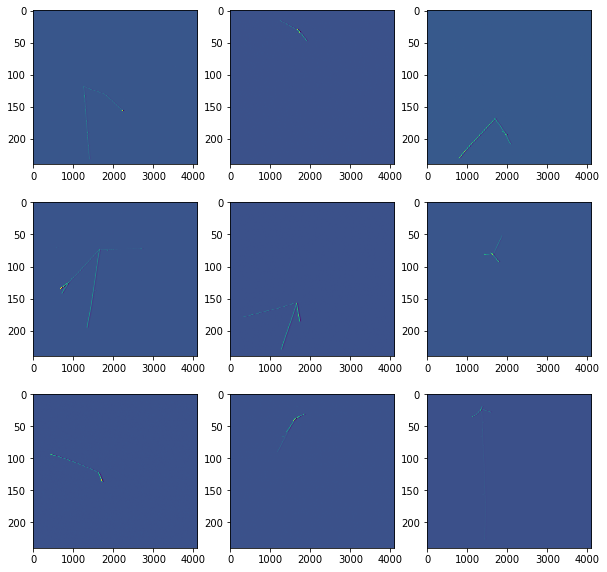

kaonPlus :


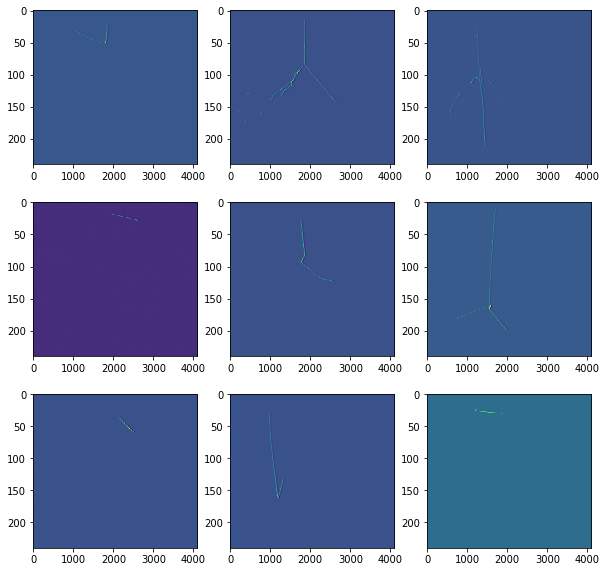

antielectron :


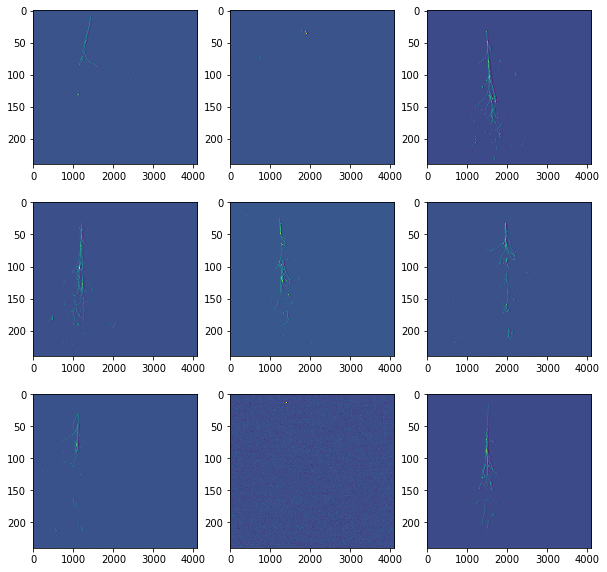

pion :


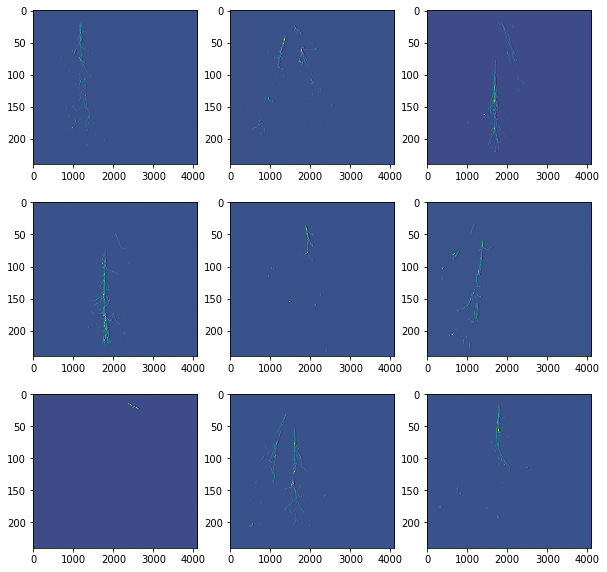

numubar :


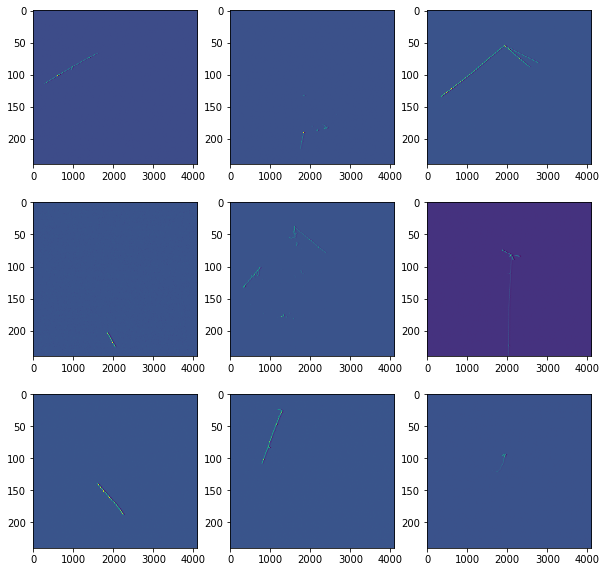

nuebar :


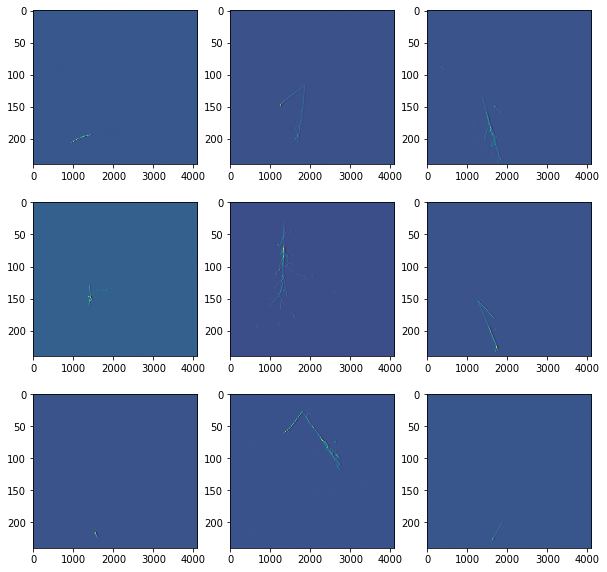

photon :


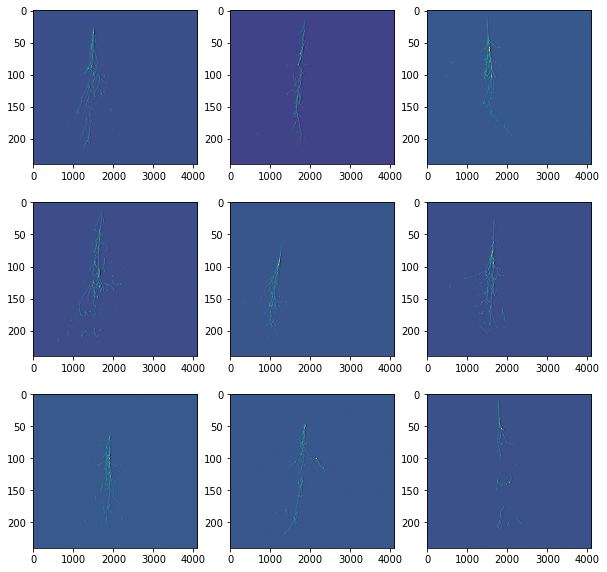

antiproton :


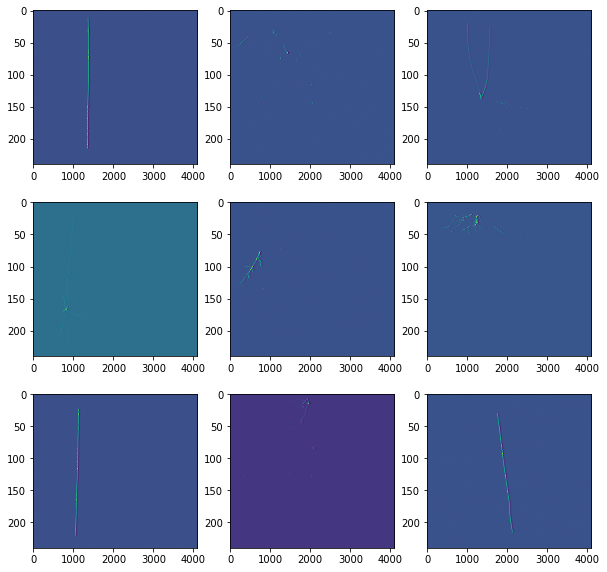

proton :


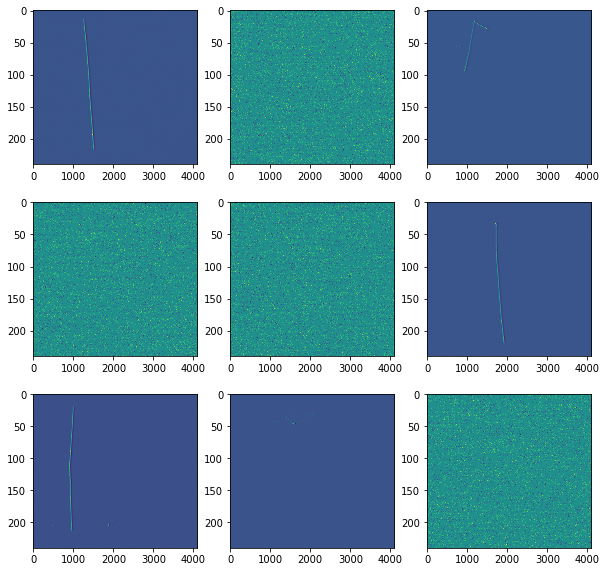

electron :


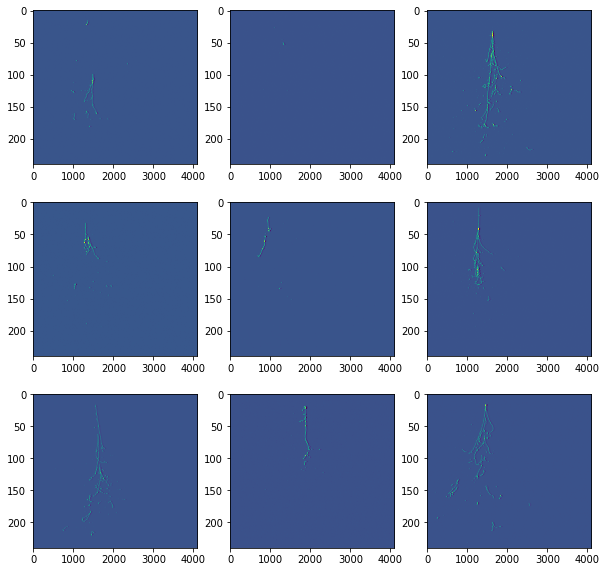

muon :


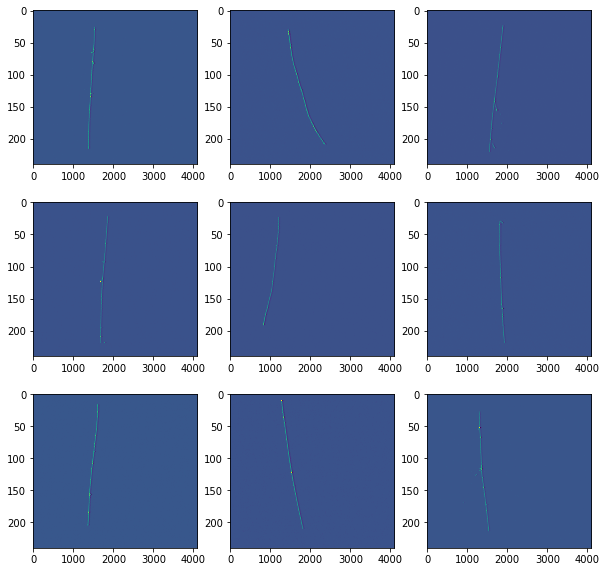

pionPlus :


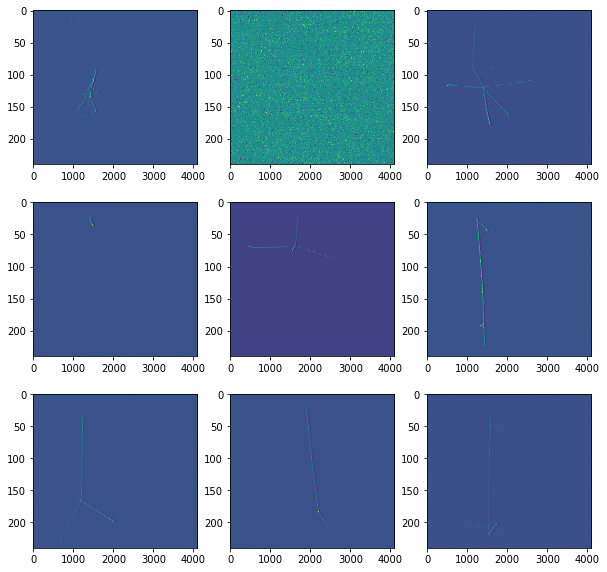

kaonMinus :


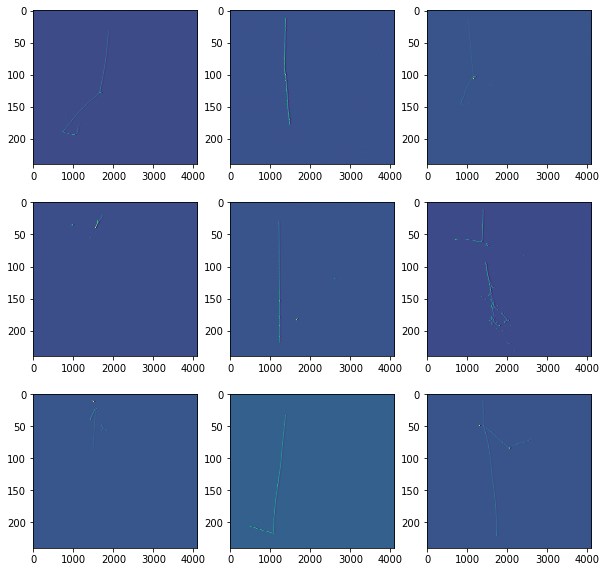

nue :


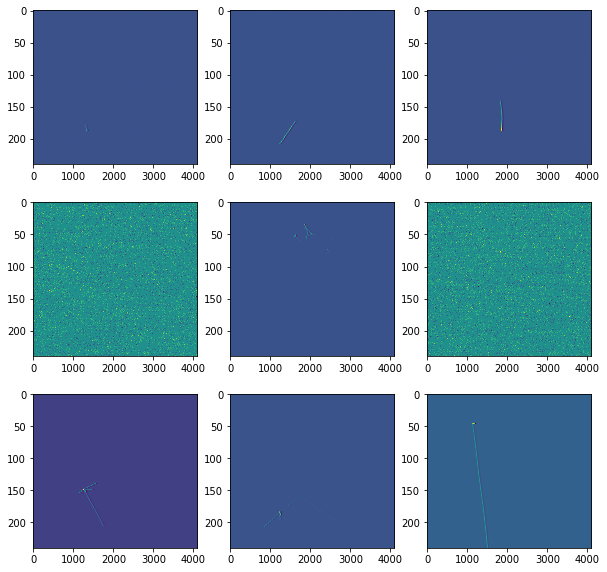

antimuon :


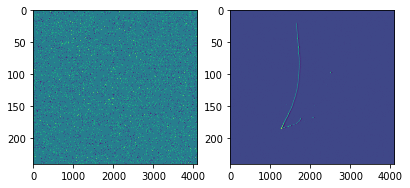

pionMinus :


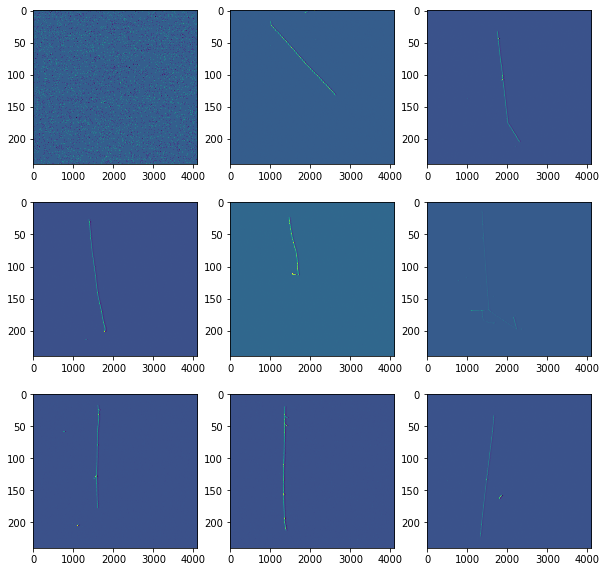

In [7]:

def PlotEvents(FileName, N_Events):
    ### BEGIN SOLUTION
    
    import math
    
    # Load the given file
    f=h5py.File(FileLists[FileName][0],"r")

    # Get the images
    images=f["features"]
    
    size = math.sqrt(N_Events) #side length of grid.
    size = int(math.ceil(size)) #clean up the square root. Uses math.ceil() because if N_Events isn't a perfect square, say, 10
                                #then the smallest squre grid would need to be the side length of the next largest perfect square
    
    plt.figure(figsize=(10,10))
    for length in range(0,N_Events):
        if length < N_Events_perFile[FileName][0]: #make sure the passed file actually has the number of events passed
            plt.subplot(size,size,length+1)
            plt.imshow(np.array(images[length][0],dtype="float32"),aspect=16)
    plt.show()

            
    f.close

    
    ### END SOLUTION
    pass

N_Events=9

for aFile in FileLists:
    FileName=FileLists[aFile][0]
    ParticleName=os.path.basename(FileName).split('_')[0]
    
    print ParticleName, ":"
    PlotEvents(ParticleName,N_Events)

### Exercise 3.2.2- Train Yourself

By looking closely at each particle type, identify at least one "feature" that would allow you to by eye uniquely identify that particle type. 

## Type you answer in this box.

### BEGIN SOLUTION

- muon/antimuon: 1 track about the length of the image
- electron/antielectron: a single jet
- pion: one or two moderate length jets
- pionPlus/pionMinus: large number of tracks or a long vertical track with extra, short track at end.
- kaonPlus/kaonMinus: a single short track or three tracks either isometric or two in line and one askew
- photon: 1 long jet
- nue/nuebar: 1 jet or jet and track or very short track and no jet.
- numu/numubar: 2 or more tracks at varying angles
- proton/antiproton: a very long track or nothing

### END SOLUTION

## Validation (Homework)

Now we have to setup a validation process. We will first assign each particle type a unique index. Then we will load some events of each particle type and mix them while keeping track of the indecies. Finally we will present the images to the handscanner, ask them to classify, and keep track of how well they do.

Read through and try to understand the following code which sets up 2 dictionaries we will use to uniquely identify particle types. 

In [8]:
import numpy as np

# Assign index to particle type
ParticleTypesIndexMap = {}

for i,ParticleType in enumerate(FileLists.keys()):    
    ParticleTypesIndexMap[ParticleType]=i
    
# Merge particle/anti-particle
for ParticleName in ParticleTypesIndexMap:
    if 'bar' in ParticleName:
        ParticleTypesIndexMap[ParticleName]=ParticleTypesIndexMap[ParticleName.split('bar')[0]]
        
    if 'anti' in ParticleName:
        ParticleTypesIndexMap[ParticleName]=ParticleTypesIndexMap[ParticleName.split('anti')[1]]

    if 'Minus' in ParticleName:
        ParticleTypesIndexMap[ParticleName]=ParticleTypesIndexMap[ParticleName.split('Minus')[0]+"Plus"]
    
print "Index map:"
print ParticleTypesIndexMap

# Reverse Map
ParticleTypesIndexMapR={}

for p in ParticleTypesIndexMap:
    if ParticleTypesIndexMap[p] not in ParticleTypesIndexMapR:
        ParticleTypesIndexMapR[ParticleTypesIndexMap[p]]=p

print "Reverse Index map:"
print ParticleTypesIndexMapR



Index map:
{'numu': 0, 'nue': 13, 'antielectron': 9, 'pion': 3, 'numubar': 0, 'nuebar': 13, 'photon': 6, 'electron': 9, 'proton': 8, 'antiproton': 8, 'muon': 10, 'pionPlus': 11, 'kaonMinus': 1, 'kaonPlus': 1, 'antimuon': 10, 'pionMinus': 11}
Reverse Index map:
{0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}


Now we load the data and mix them:

In [10]:
Data_X = None
Data_Y = None
N_Events_perType=10

for ParticleType in FileLists:
    # Open the first file
    FileName=FileLists[ParticleType][1] # we will take the 2nd file so we don't use the training sample for validation
    print "Opening:",FileName
    f=h5py.File(FileName,"r")
    
    # Get the images/features
    images=np.array(f["features"][:N_Events_perType])
    
    # Warn if not enough events
    N_Events_read=images.shape[0]
    if not N_Events_read==N_Events_perType:
        print "Warning: Sample", FileName, "had only",N_Events_read,"events."
    
    # Assign labels
    labels=np.empty(N_Events_read)
    labels.fill(ParticleTypesIndexMap[ParticleType])

    # Store some of them
    try:
        # If we have already read some data, add to it
        Data_X=np.concatenate((Data_X,images))
        Data_Y=np.concatenate((Data_Y,labels))
    except:
        # If we haven't read any data yet
        Data_X=images
        Data_Y=labels
    
        
    f.close()

print Data_X.shape, Data_Y.shape

def shuffle_in_unison_inplace(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]
    
Data_X,Data_Y=shuffle_in_unison_inplace(Data_X,Data_Y)    

Opening: /data/LArIAT/h5_files/numu_CC_7-1469162877.h5
Opening: /data/LArIAT/h5_files/kaonPlus_5-1466605529.h5
Opening: /data/LArIAT/h5_files/antielectron_2-1462204074.h5
Opening: /data/LArIAT/h5_files/pion_0_19-1465222696.h5
Opening: /data/LArIAT/h5_files/numubar_CC_10-1469306203.h5
Opening: /data/LArIAT/h5_files/nuebar_NC_0-1469513434.h5
Opening: /data/LArIAT/h5_files/photon_2-1466642559.h5
Opening: /data/LArIAT/h5_files/antiproton_7-1466998552.h5
Opening: /data/LArIAT/h5_files/proton_15-1466439654.h5
Opening: /data/LArIAT/h5_files/electron_19-1464793391.h5
Opening: /data/LArIAT/h5_files/muon_14-1466218429.h5
Opening: /data/LArIAT/h5_files/pionPlus_1-1463590721.h5
Opening: /data/LArIAT/h5_files/kaonMinus_14-1463590719.h5
Opening: /data/LArIAT/h5_files/nue_NC_14-1461971806.h5
Opening: /data/LArIAT/h5_files/antimuon_3-1466967198.h5
Opening: /data/LArIAT/h5_files/pionMinus_5-1466714027.h5
(155, 2, 240, 4096) (155,)


In [11]:
print Data_Y

[ 13.   8.   3.   9.   8.  13.   9.   9.  11.   6.   8.  11.   8.  13.   1.
  11.   8.   8.  10.  11.  10.   3.   0.   9.   8.   8.   0.   9.   6.   6.
   1.  11.   6.   6.  11.   1.   0.   8.   9.  10.  11.   0.   9.  10.  10.
  10.  10.   0.   3.   6.   1.   9.  13.   0.   9.  10.  13.  13.  11.  13.
   0.  10.   6.   0.  11.   1.   0.   0.   6.  11.   9.  13.   1.  11.  10.
   3.   0.  13.   9.   1.  11.  13.   3.  13.   1.  11.   3.   9.  10.  11.
   1.   0.   6.   1.   3.   8.  10.   1.   1.  13.   9.   6.   1.   8.   8.
  13.   1.   9.   8.  11.   0.   8.   9.   8.  13.   1.   0.   9.   1.  10.
   3.   1.  13.   8.   8.   0.   0.   0.  10.  13.   1.   9.   9.   8.   0.
   1.   3.  11.  13.   9.  11.   9.  13.   3.  13.   0.   8.  13.  11.  11.
  11.   1.   8.  10.   0.]


##  Exercise 3.3.1

The following code presents images and asks the handscanner for a type. Read through it carefully. Try it out. Then instrument this code so it keeps track of success and failures. The goal is to create a confusion matrix, a table that keeps track of how often each particle type is correctly identified and how often it is misidentified as any other type.  

image  0


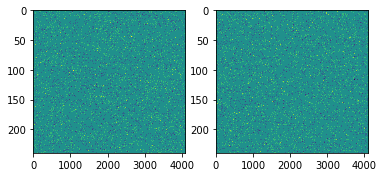

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  1


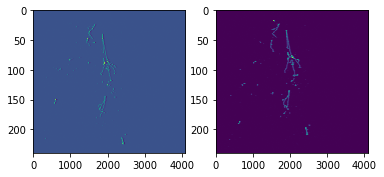

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  2


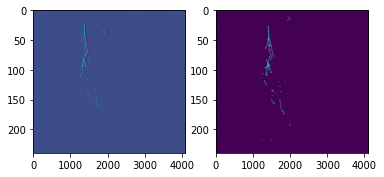

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  3


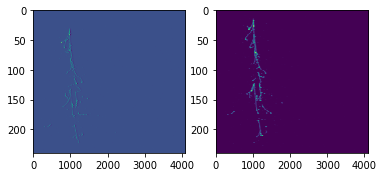

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  4


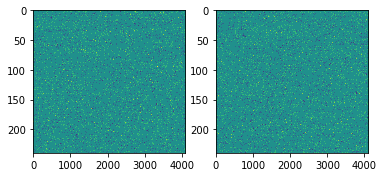

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  5


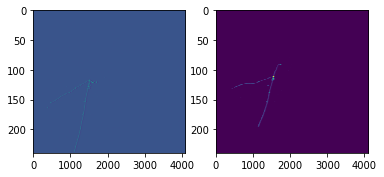

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  6


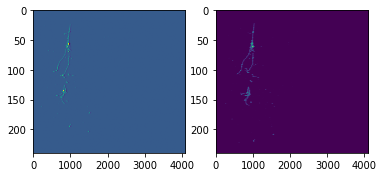

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  7


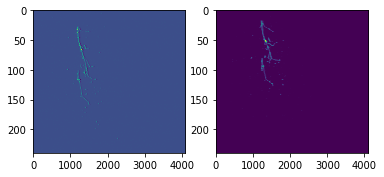

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  8


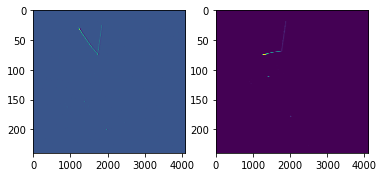

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  9


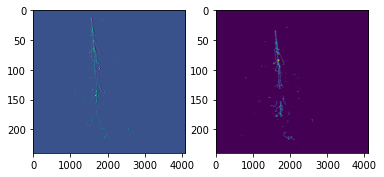

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  10


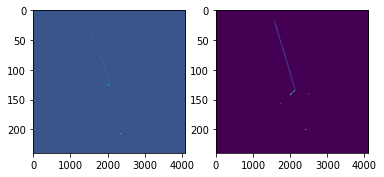

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  11


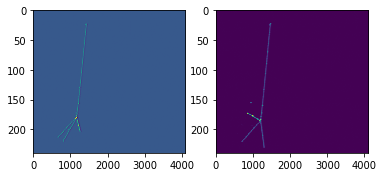

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  12


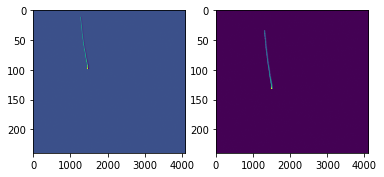

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  13


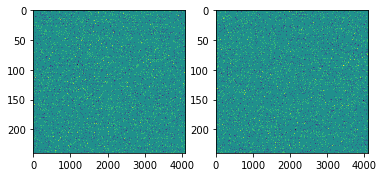

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  14


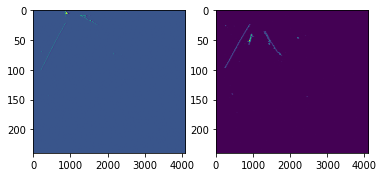

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  15


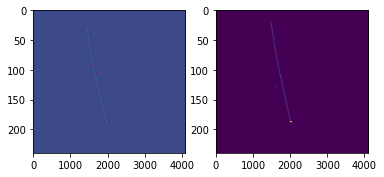

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  16


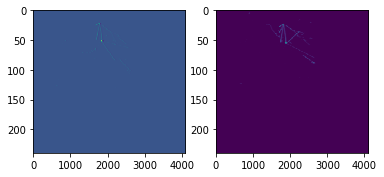

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  17


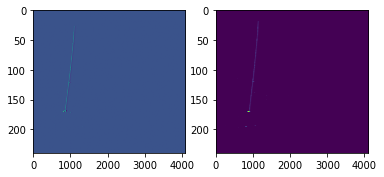

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  18


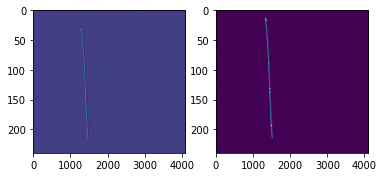

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  19


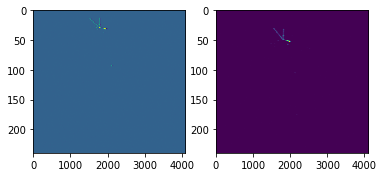

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  20


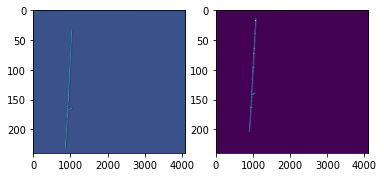

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  21


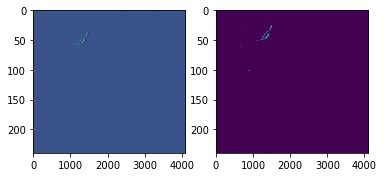

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  22


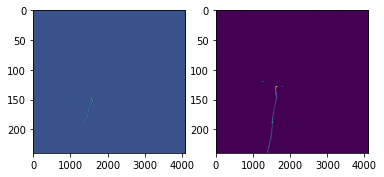

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  23


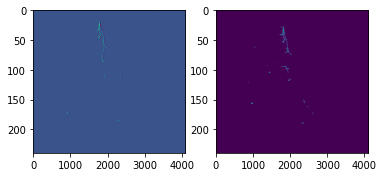

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  24


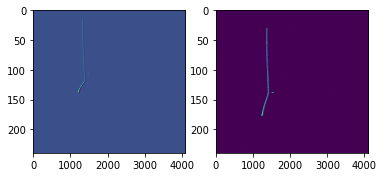

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  25


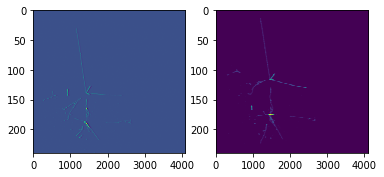

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  26


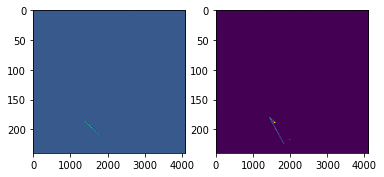

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  27


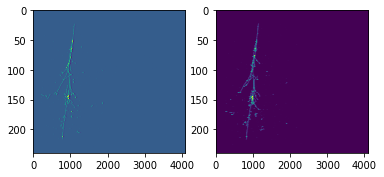

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  28


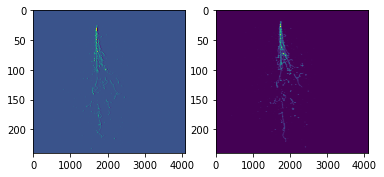

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  29


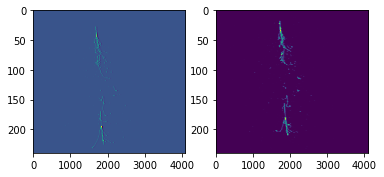

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  30


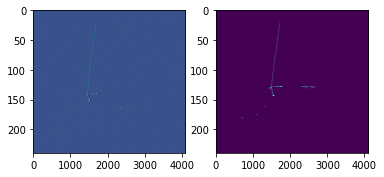

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  31


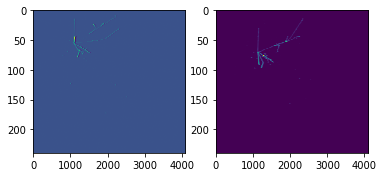

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  32


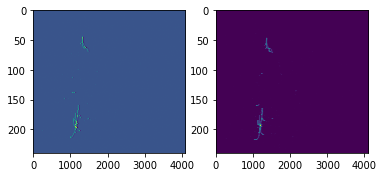

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  33


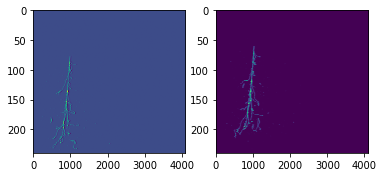

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  34


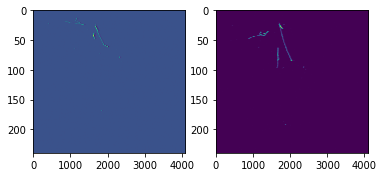

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  35


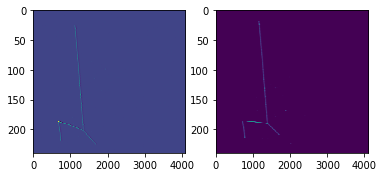

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  36


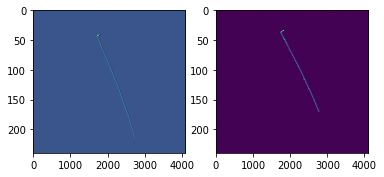

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  37


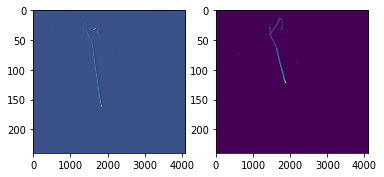

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  38


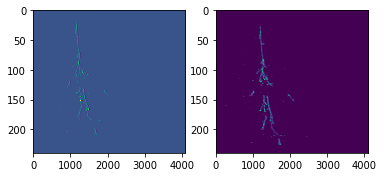

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  39


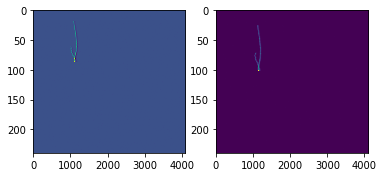

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  40


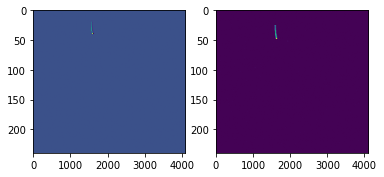

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  41


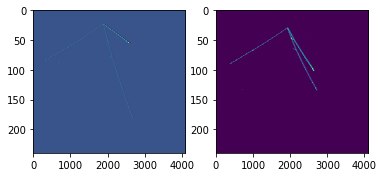

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  42


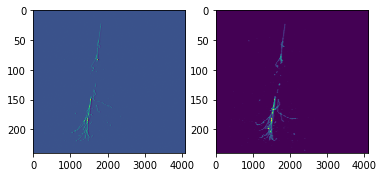

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  43


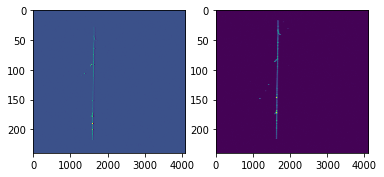

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  44


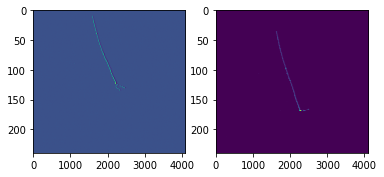

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  45


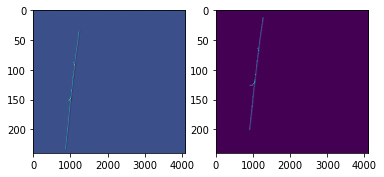

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  46


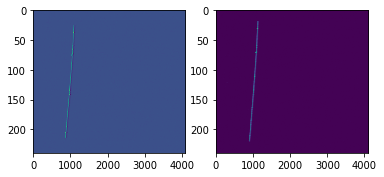

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  47


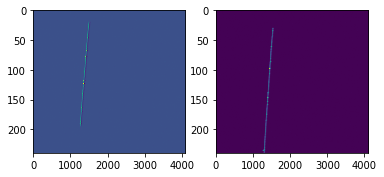

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  48


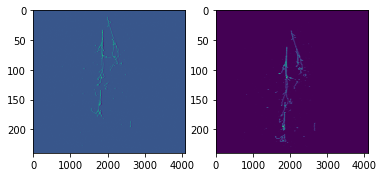

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  49


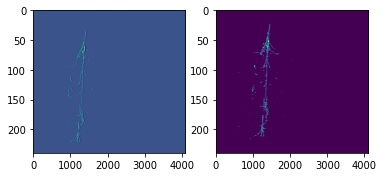

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  50


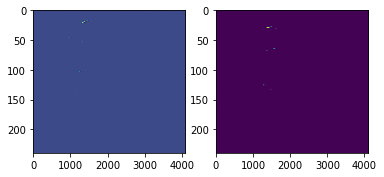

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  51


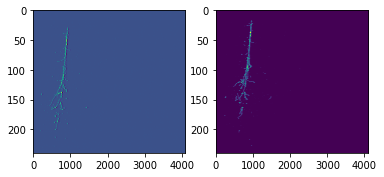

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  52


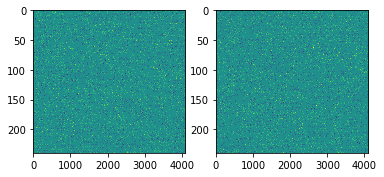

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  53


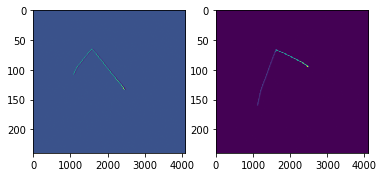

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  54


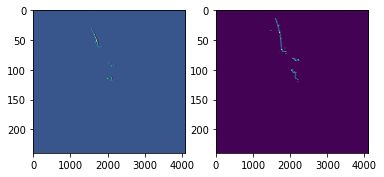

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  55


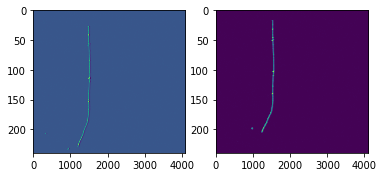

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  56


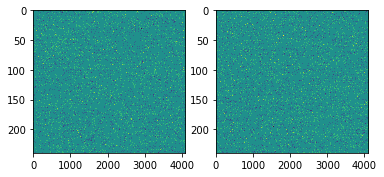

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  57


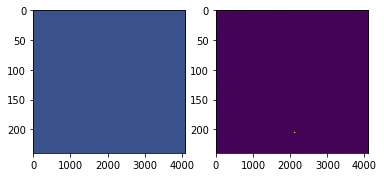

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  58


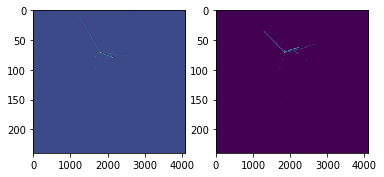

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  59


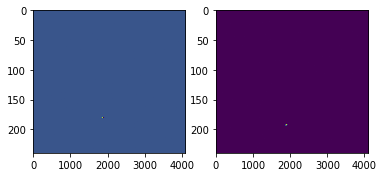

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  60


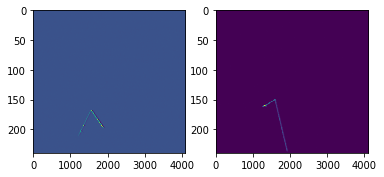

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  61


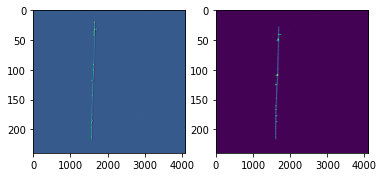

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  62


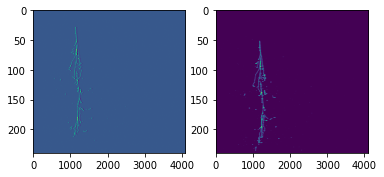

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  63


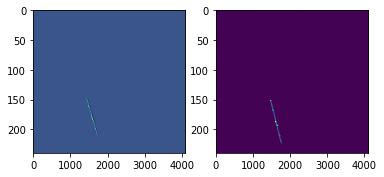

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  64


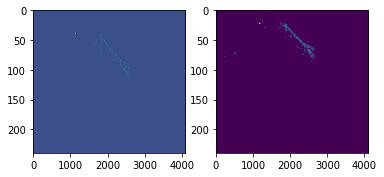

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  65


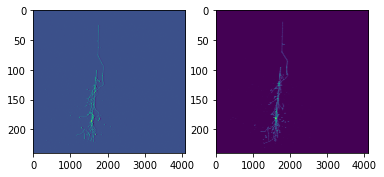

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  66


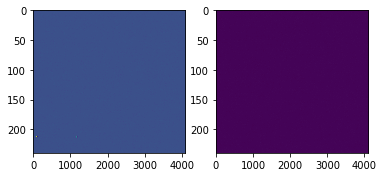

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  67


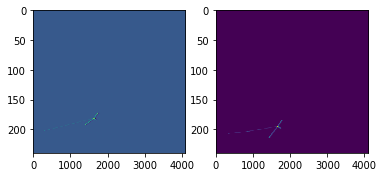

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  68


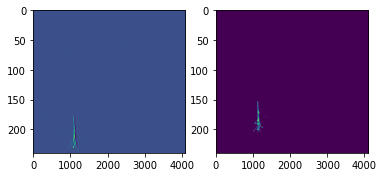

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  69


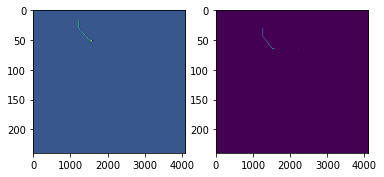

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  70


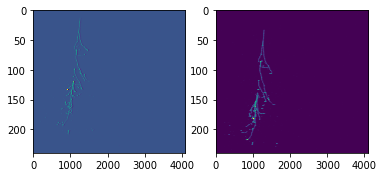

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  71


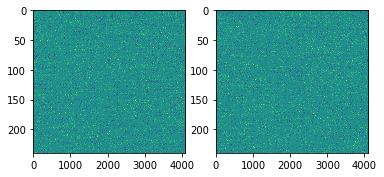

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  72


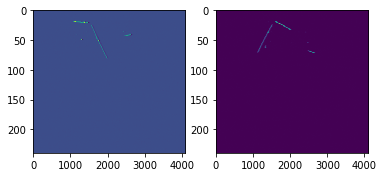

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  73


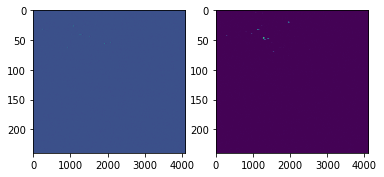

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  74


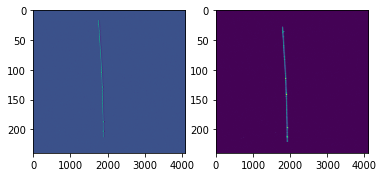

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  75


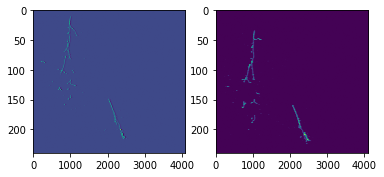

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  76


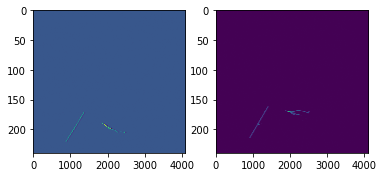

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  77


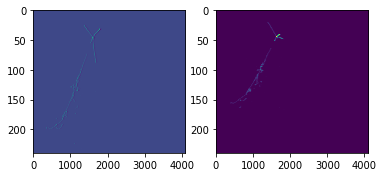

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  78


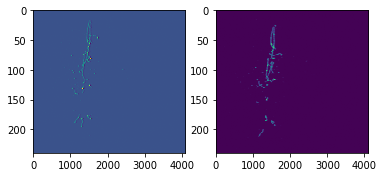

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  79


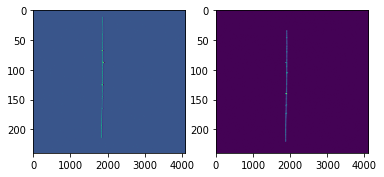

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  80


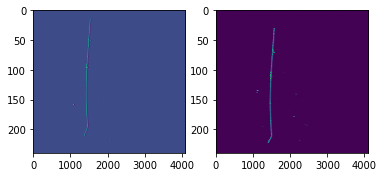

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  81


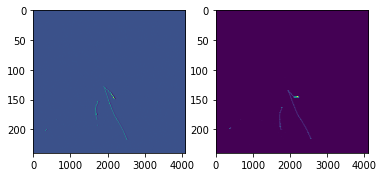

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  82


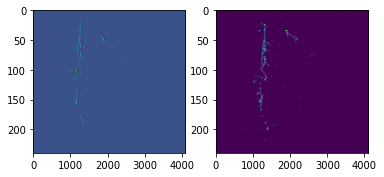

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  83


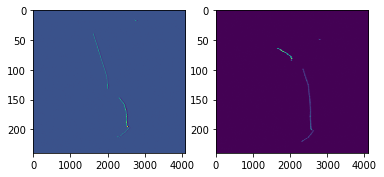

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  84


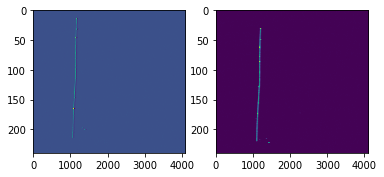

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  85


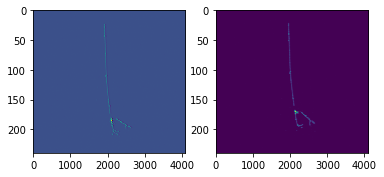

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  86


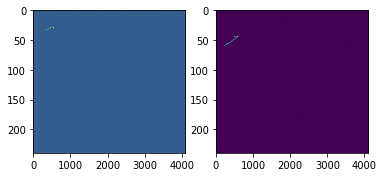

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  87


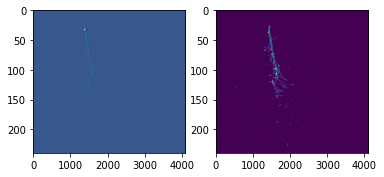

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  88


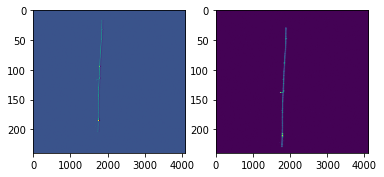

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  89


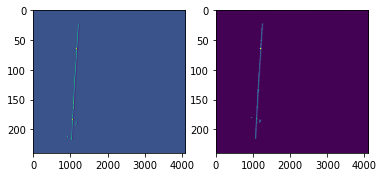

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  90


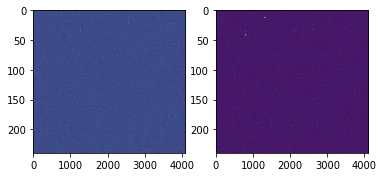

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  91


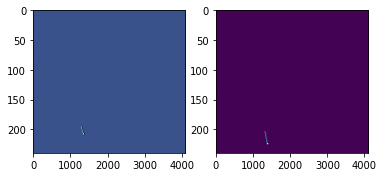

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  92


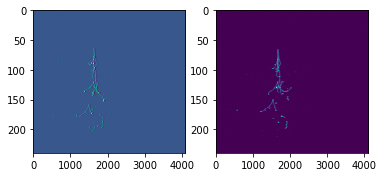

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  93


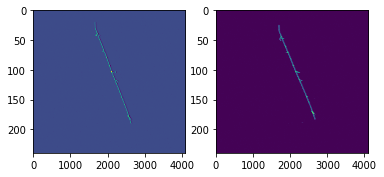

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  94


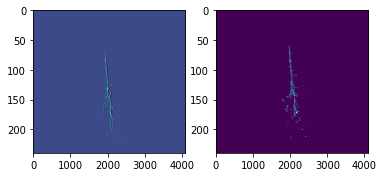

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  95


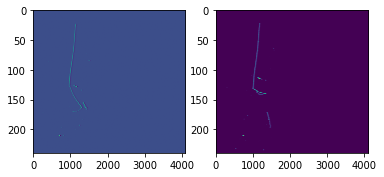

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  96


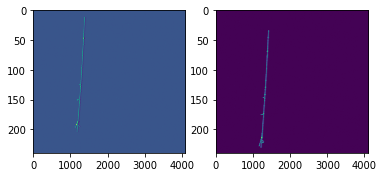

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  97


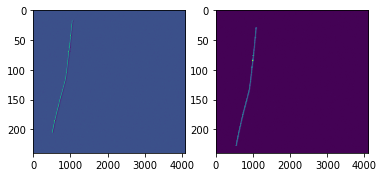

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  98


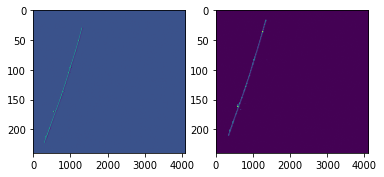

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  99


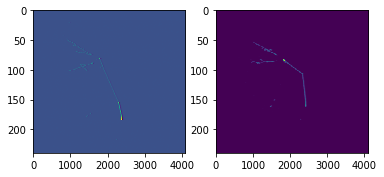

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  100


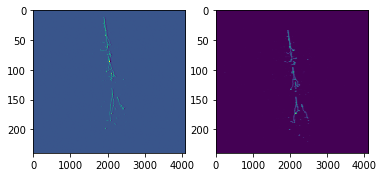

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  101


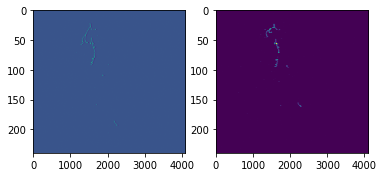

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  102


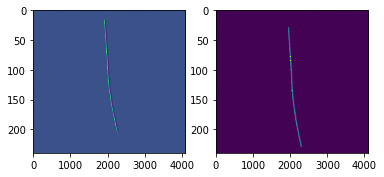

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  103


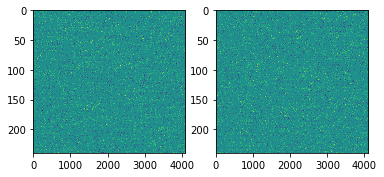

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  104


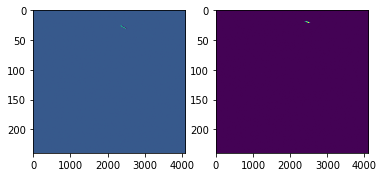

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  105


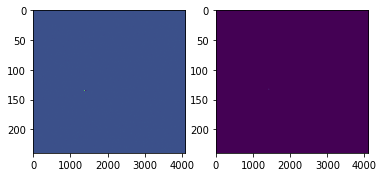

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  106


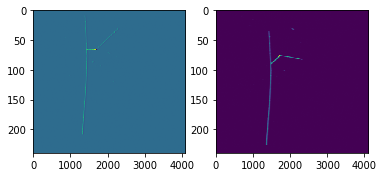

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  107


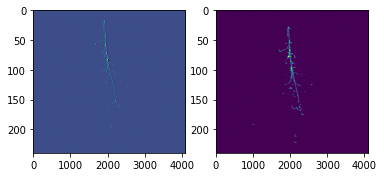

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  108


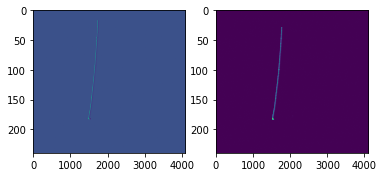

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  109


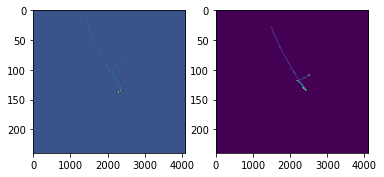

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  110


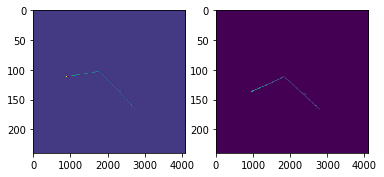

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  111


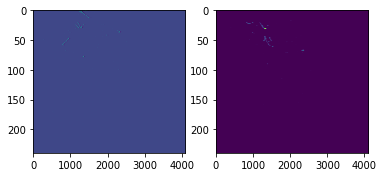

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  112


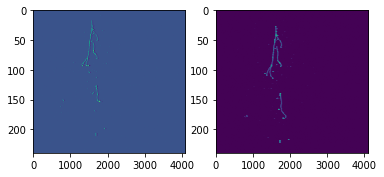

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  113


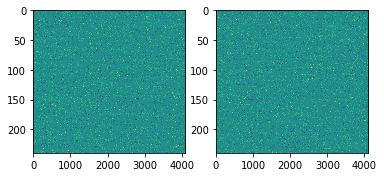

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  114


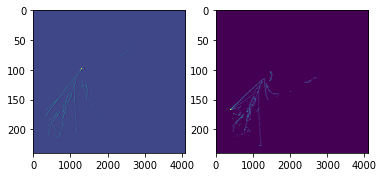

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  115


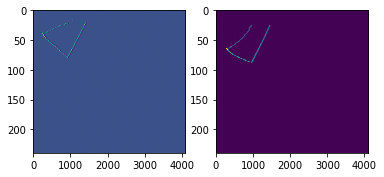

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  116


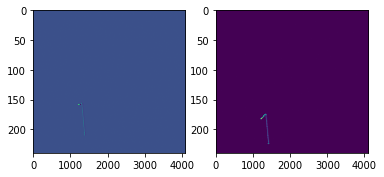

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  117


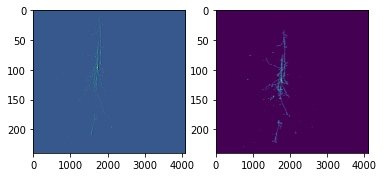

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  118


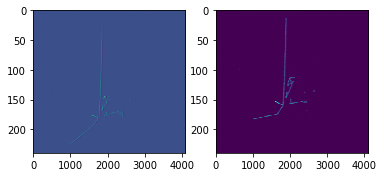

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  119


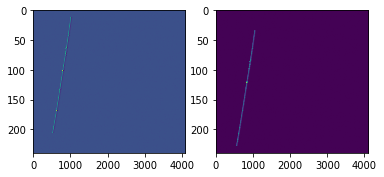

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  120


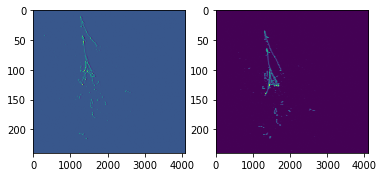

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  121


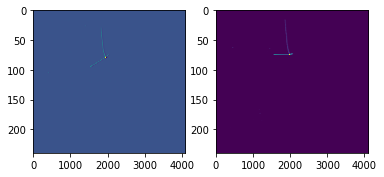

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  122


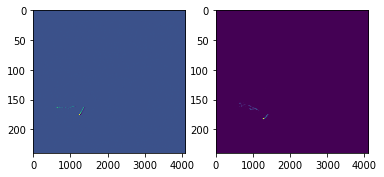

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  123


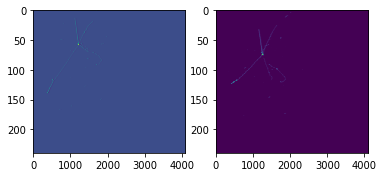

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  124


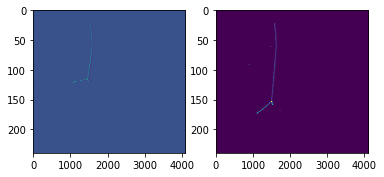

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  125


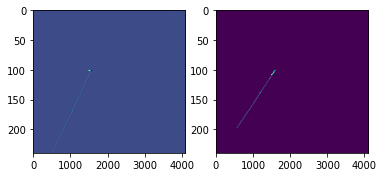

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:11
You selected: pionPlus
image  126


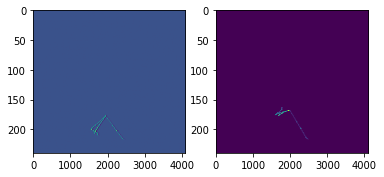

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  127


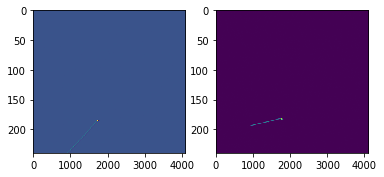

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  128


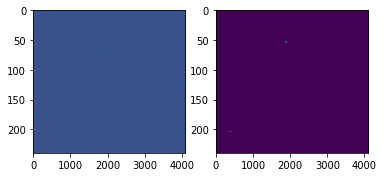

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  129


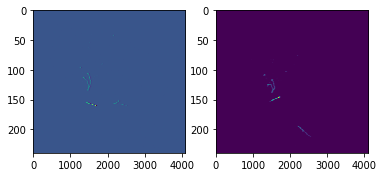

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  130


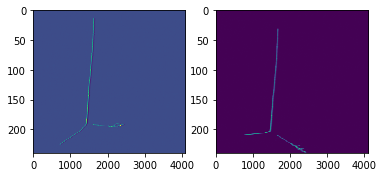

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  131


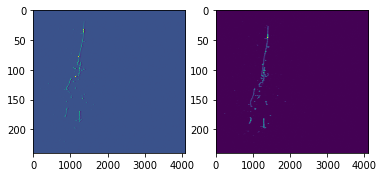

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  132


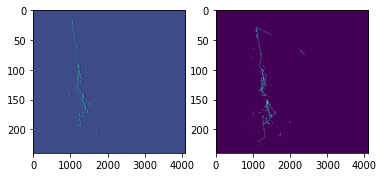

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:9
You selected: antielectron
image  133


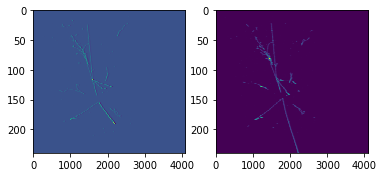

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  134


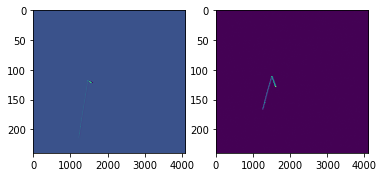

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  135


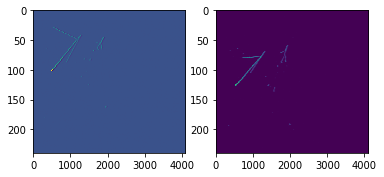

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  136


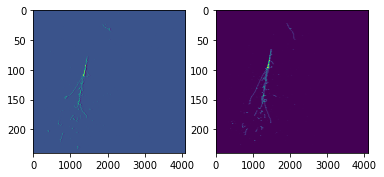

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  137


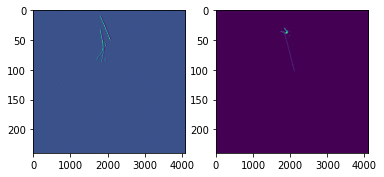

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  138


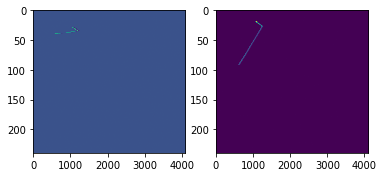

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  139


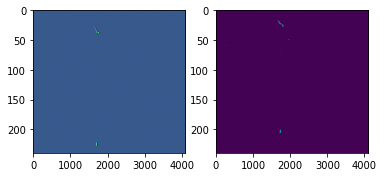

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  140


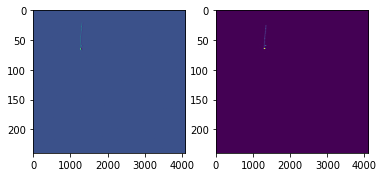

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  141


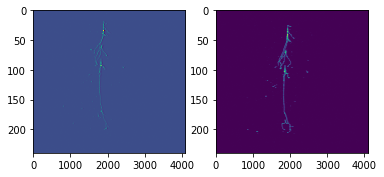

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:6
You selected: photon
image  142


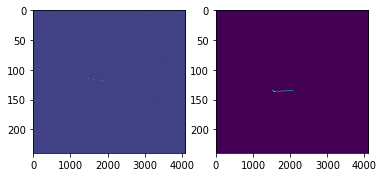

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  143


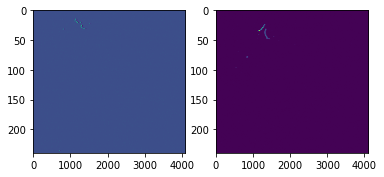

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  144


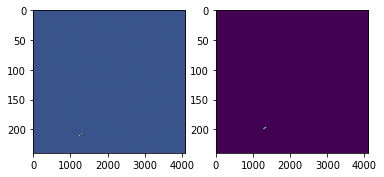

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  145


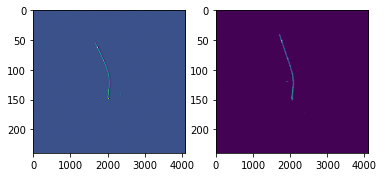

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  146


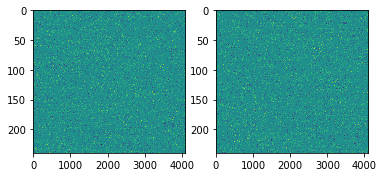

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  147


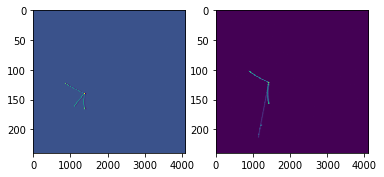

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:1
You selected: kaonMinus
image  148


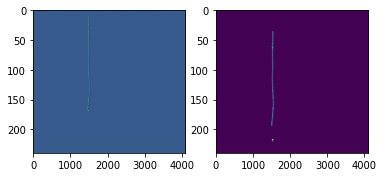

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:8
You selected: proton
image  149


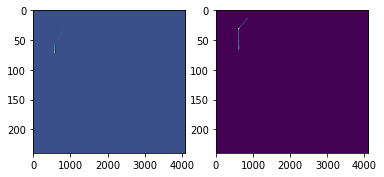

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:13
You selected: nue
image  150


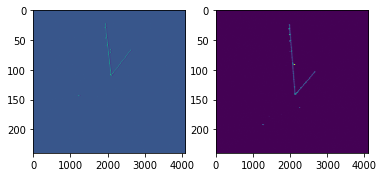

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu
image  151


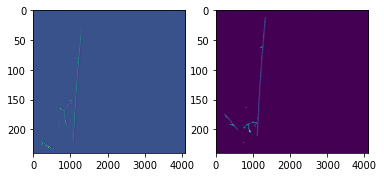

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:3
You selected: pion
image  152


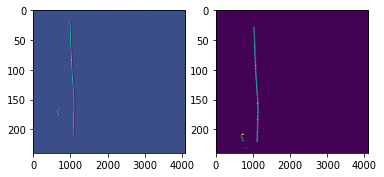

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  153


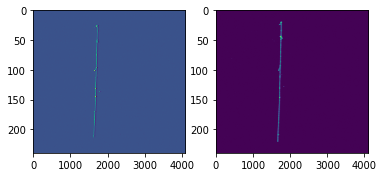

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:10
You selected: muon
image  154


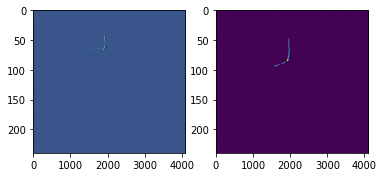

Select Type from: {0: 'numu', 1: 'kaonMinus', 3: 'pion', 6: 'photon', 8: 'proton', 9: 'antielectron', 10: 'muon', 11: 'pionPlus', 13: 'nue'}
Input:0
You selected: numu


In [12]:
View=0
MatSize = int(max(Data_Y))+1
ConfMat = [[0 for x in range(MatSize)] for x in range(MatSize)]
for image in Data_X:
    print "image ", View
    PlotEvent(image)
    plt.show()
    
    print "Select Type from:", ParticleTypesIndexMapR
    try:
        answer=int(raw_input('Input:'))
        ConfMat[int(Data_Y[View])][answer] += 1;
    except ValueError:
        print "Not a number"
    View += 1;    
    # Stop loop
    if answer==-1:
        break
    
    print "You selected:", ParticleTypesIndexMapR[answer]
        

##  Exercise 3.3.2

Make yourself the handscanner. Use above code to go through the full data sample and create a confusion matrix.

In [22]:
HW = ConfMat;

In [24]:
for i in range(14):
    print HW[i]

[4, 4, 0, 2, 0, 0, 0, 0, 3, 0, 1, 2, 0, 4]
[1, 7, 0, 1, 0, 0, 1, 0, 4, 0, 3, 1, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0, 4, 0, 0, 3, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 0, 1, 0, 0, 0, 0, 7, 0, 1, 4, 0, 1]
[1, 0, 0, 2, 0, 0, 7, 0, 1, 7, 0, 0, 0, 2]
[1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 8, 1, 0, 0]
[3, 6, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 6, 0, 1, 0, 0, 0, 0, 5, 0, 0, 1, 0, 3]


## Honors Problems:

### Exercise 3.4.1
Write a function that downsamples all of images by summing samples to reduce the 4096 long dimension of the data.

### Exercise 3.4.2
Write a function that returns a sub-region in the 4096 long dimention where the total charge is max.